In [81]:

# Langkah 1: Prepare Library dan File Audio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
from IPython.display import Audio

sample_rate, data = wavfile.read("cat_2.wav")

data = data.astype(float)



In [82]:
# Langkah 2: Menghitung Transformasi Fourier Cepat (FFT)
signal_length = len(data)
fft_data = fft(data)


In [83]:
# Langkah 3: Filtering
frequencies = np.linspace(0.0, sample_rate, signal_length)

dog_frequency = 500
cat_frequency = 2000

dog_index = np.abs(frequencies - dog_frequency).argmin()
cat_index = np.abs(frequencies - cat_frequency).argmin()

filtered_data = np.copy(fft_data)

filtered_data[:dog_index] = 0
filtered_data[cat_index:] = 0



In [84]:
# Langkah 4: Transformasi Fourier Cepat Balik (Inverse FFT)
filtered_signal = ifft(filtered_data)

filtered_signal = filtered_signal.astype(int)


C:\Users\HP\AppData\Local\Temp\ipykernel_13264\2990615372.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_signal = filtered_signal.astype(int)


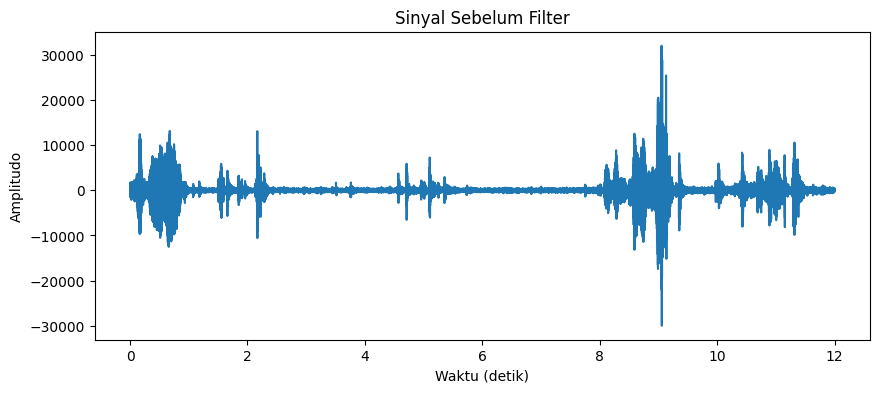

In [85]:
# Langkah 5: Visualisasi
plt.figure(figsize=(10, 4))
plt.title("Sinyal Sebelum Filter")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.plot(np.arange(signal_length) / sample_rate, data)
plt.show()


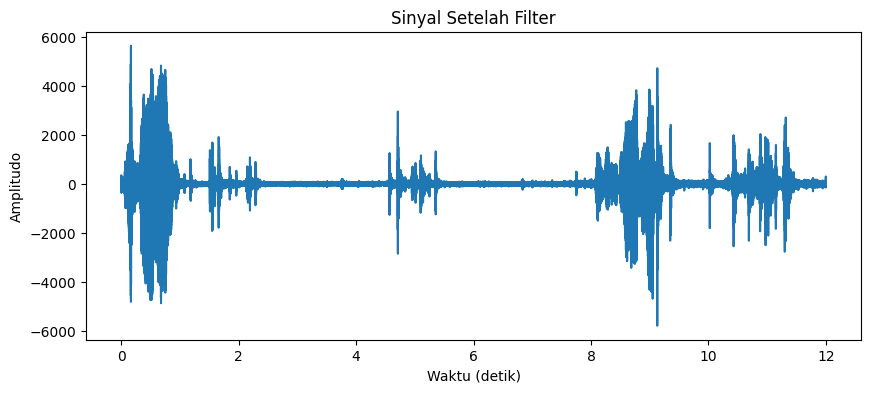

In [86]:
plt.figure(figsize=(10, 4))
plt.title("Sinyal Setelah Filter")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.plot(np.arange(signal_length) / sample_rate, filtered_signal)
plt.show()


In [87]:
# Langkah 6: Output Pemutar Audio
# Memainkan file audio asli 
wavfile.write("filtered_output.wav", sample_rate, filtered_signal)

Audio(data, rate=sample_rate)




In [88]:

# Memainkan file audio yang telah difilter
filtered_audio = wavfile.read("filtered_output.wav")
Audio(filtered_audio[1], rate=sample_rate)

In [89]:
# Analisis suara (anjing atau kucing)
dog_amplitude = np.max(np.abs(filtered_signal[:dog_index]))
cat_amplitude = np.max(np.abs(filtered_signal[cat_index:]))

if dog_amplitude > cat_amplitude:
    print("Suara hasil adalah suara anjing.")
else:
    print("Suara hasil adalah suara kucing.")

Suara hasil adalah suara kucing.
